In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("../data/raw/liver_cancer_prediction.csv")

## EDA

In [3]:
data.head()

,Country,Region,Population,Incidence_Rate,Mortality_Rate,Gender,Age,Alcohol_Consumption,Smoking_Status,Hepatitis_B_Status,...,Herbal_Medicine_Use,Healthcare_Access,Screening_Availability,Treatment_Availability,Liver_Transplant_Access,Ethnicity,Preventive_Care,Survival_Rate,Cost_of_Treatment,Prediction
0,Nigeria,Sub-Saharan Africa,340672131,15.381360,6.160480,Male,81,Low,Smoker,Negative,...,No,Poor,Available,Available,No,Hispanic,Good,17.724793,47486.167423,Yes
1,United Kingdom,Europe,1054632817,3.306101,14.392985,Male,87,Low,Smoker,Negative,...,Yes,Good,Available,Not Available,No,Mixed,Moderate,19.558853,13782.265151,No
2,India,South Asia,751241440,9.325053,12.777878,Male,34,Moderate,Smoker,Negative,...,No,Good,Not Available,Not Available,No,Mixed,Moderate,68.468892,25308.034132,No
3,Colombia,South America,1167333367,9.399658,8.634609,Male,63,Low,Non-Smoker,Positive,...,No,Good,Not Available,Not Available,Yes,Hispanic,Moderate,18.200287,38221.622202,No
4,Iran,Middle East,1082070787,9.665663,12.422518,Male,85,High,Non-Smoker,Positive,...,Yes,Moderate,Available,Available,Yes,Mixed,Moderate,45.019153,26765.301404,No


In [4]:
print("Dataset Shape:", data.shape)

Dataset Shape: (160292, 25)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160292 entries, 0 to 160291
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  160292 non-null  object 
 1   Region                   160292 non-null  object 
 2   Population               160292 non-null  int64  
 3   Incidence_Rate           160292 non-null  float64
 4   Mortality_Rate           160292 non-null  float64
 5   Gender                   160292 non-null  object 
 6   Age                      160292 non-null  int64  
 7   Alcohol_Consumption      160292 non-null  object 
 8   Smoking_Status           160292 non-null  object 
 9   Hepatitis_B_Status       160292 non-null  object 
 10  Hepatitis_C_Status       160292 non-null  object 
 11  Obesity                  160292 non-null  object 
 12  Diabetes                 160292 non-null  object 
 13  Rural_or_Urban           160292 non-null  object 
 14  Seaf

In [6]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Country                    0
Region                     0
Population                 0
Incidence_Rate             0
Mortality_Rate             0
Gender                     0
Age                        0
Alcohol_Consumption        0
Smoking_Status             0
Hepatitis_B_Status         0
Hepatitis_C_Status         0
Obesity                    0
Diabetes                   0
Rural_or_Urban             0
Seafood_Consumption        0
Herbal_Medicine_Use        0
Healthcare_Access          0
Screening_Availability     0
Treatment_Availability     0
Liver_Transplant_Access    0
Ethnicity                  0
Preventive_Care            0
Survival_Rate              0
Cost_of_Treatment          0
Prediction                 0
dtype: int64


The dataset has no missing values across any of the 25 variables. This completeness is beneficial for modeling as it eliminates the risk of bias introduced by missing data handling methods such as mean imputation or predictive modeling.

In [7]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [8]:
# Get summary statistics for numerical features
data.describe()

,Population,Incidence_Rate,Mortality_Rate,Age,Survival_Rate,Cost_of_Treatment
count,1.602920e+05,160292.000000,160292.000000,160292.000000,160292.000000,160292.000000
mean,7.527321e+08,18.523468,15.525234,54.640088,49.957811,25275.608904
std,4.328283e+08,9.513400,8.376871,20.188217,23.036437,14307.105453
min,1.011968e+06,2.000035,1.000080,20.000000,10.000548,500.397303
25%,3.772400e+08,10.319582,8.286968,37.000000,30.129577,12858.138774
50%,7.548388e+08,18.529822,15.565488,55.000000,49.858143,25349.819261
75%,1.126721e+09,26.751354,22.808666,72.000000,69.833652,37672.515875
max,1.499993e+09,34.999952,29.999829,89.000000,89.998005,49999.791824


In [9]:
# Check unique values and percentage distribution in categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    value_counts = data[col].value_counts()
    percentage = (value_counts / len(data)) * 100  # Calculate percentage
    
    print(f"\n{col} - Unique Values and Distribution:\n")
    print(pd.DataFrame({'Count': value_counts, 'Percentage': percentage.round(2)}))


Country - Unique Values and Distribution:

                Count  Percentage
Country                          
Italy            5473        3.41
Egypt            5449        3.40
DR Congo         5448        3.40
France           5442        3.40
Kenya            5393        3.36
Myanmar          5388        3.36
Bangladesh       5388        3.36
Brazil           5385        3.36
Japan            5380        3.36
Spain            5361        3.34
Pakistan         5360        3.34
South Africa     5359        3.34
Iran             5353        3.34
Turkey           5342        3.33
Indonesia        5342        3.33
United States    5341        3.33
Tanzania         5336        3.33
Mexico           5329        3.32
Philippines      5316        3.32
South Korea      5316        3.32
Nigeria          5315        3.32
Thailand         5307        3.31
Ethiopia         5307        3.31
Germany          5304        3.31
India            5287        3.30
Russia           5282        3.30
Chin

The dataset paints a pretty interesting picture of liver cancer risk factors and healthcare access across the world. It covers a wide range of countries, with Italy, Egypt, DR Congo, and France each making up about 3.4% of the dataset. Regionally, Sub-Saharan Africa and Europe take the lead, each accounting for about 20%, while Southeast Asia (16.6%) and South Asia (10%) also have notable representation. On the other hand, North America and Latin America have the smallest share, each contributing just over 3%. This suggests that liver cancer is being studied more extensively in regions where the disease may be more prevalent or where risk factors are more pronounced.

When it comes to demographics, men dominate the dataset (70%), which might indicate that they’re at higher risk for liver cancer compared to women. As for lifestyle factors, smoking and alcohol consumption are pretty evenly spread out, with nearly half of the individuals being smokers and alcohol use divided fairly equally across low, moderate, and high levels. Health conditions like obesity and diabetes are also major factors, with about a quarter of the population being classified as obese and nearly 20% diagnosed with diabetes—both known risk factors for liver disease.

A big concern here is healthcare access, or rather, the lack of it. About 60% of the population doesn’t have access to screening, and half of them can’t get proper treatment. Even more alarming, 80% of cases don’t have access to liver transplants, which could be a lifesaving option for some. The dataset also shows a fairly balanced ethnic representation, with African, Hispanic, Asian, Caucasian, and mixed populations each making up around 20%. In terms of preventive care, most people fall into the “moderate” care category (40%), but there’s still a significant portion receiving either poor (30%) or good (30%) care. Lastly, when looking at liver cancer predictions, about 75% of cases are predicted as low risk, while 25% are classified as high risk. That’s still a sizable number of people who might need intervention, highlighting the importance of early detection and treatment options.

There is an imbalance in the dataset. 
Majority of dependent variable values are "No". 
Similarily, some independent variables are imbalanced. Refer to outputs below

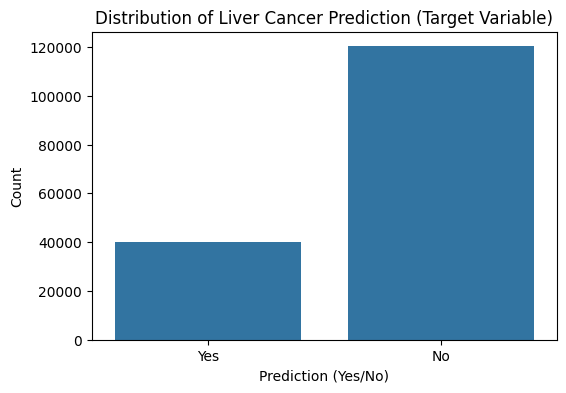

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=data["Prediction"])
plt.title("Distribution of Liver Cancer Prediction (Target Variable)")
plt.xlabel("Prediction (Yes/No)")
plt.ylabel("Count")
plt.show()

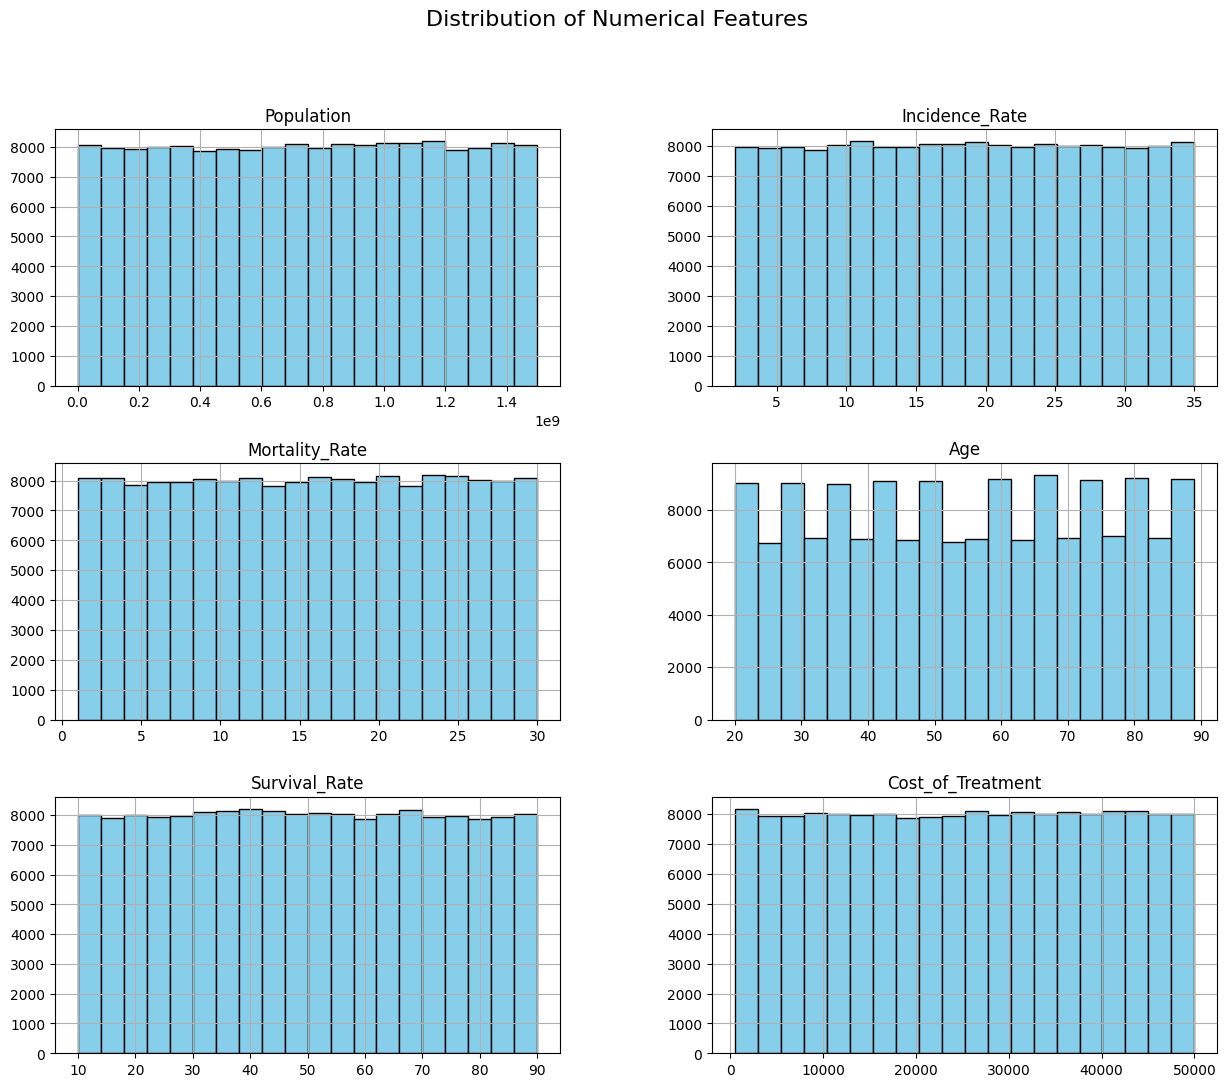

In [11]:
# List of numeric columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Histograms for numerical features
data[numerical_cols].hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

## Feature Engineering

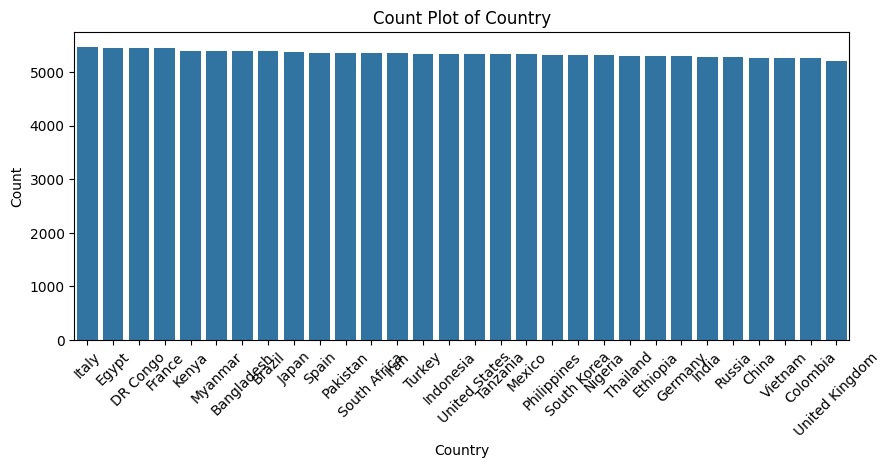


Value counts for Country:
Country
Italy             5473
Egypt             5449
DR Congo          5448
France            5442
Kenya             5393
Myanmar           5388
Bangladesh        5388
Brazil            5385
Japan             5380
Spain             5361
Pakistan          5360
South Africa      5359
Iran              5353
Turkey            5342
Indonesia         5342
United States     5341
Tanzania          5336
Mexico            5329
Philippines       5316
South Korea       5316
Nigeria           5315
Thailand          5307
Ethiopia          5307
Germany           5304
India             5287
Russia            5282
China             5261
Vietnam           5260
Colombia          5259
United Kingdom    5209
Name: count, dtype: int64


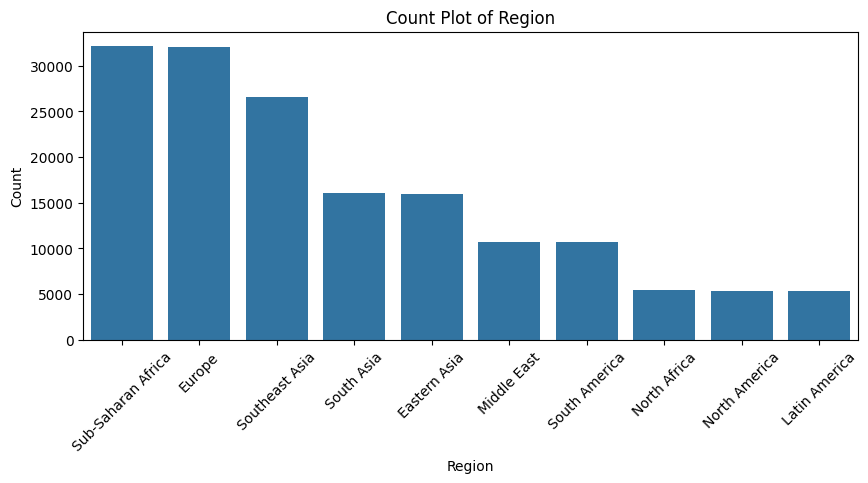


Value counts for Region:
Region
Sub-Saharan Africa    32158
Europe                32071
Southeast Asia        26613
South Asia            16035
Eastern Asia          15957
Middle East           10695
South America         10644
North Africa           5449
North America          5341
Latin America          5329
Name: count, dtype: int64


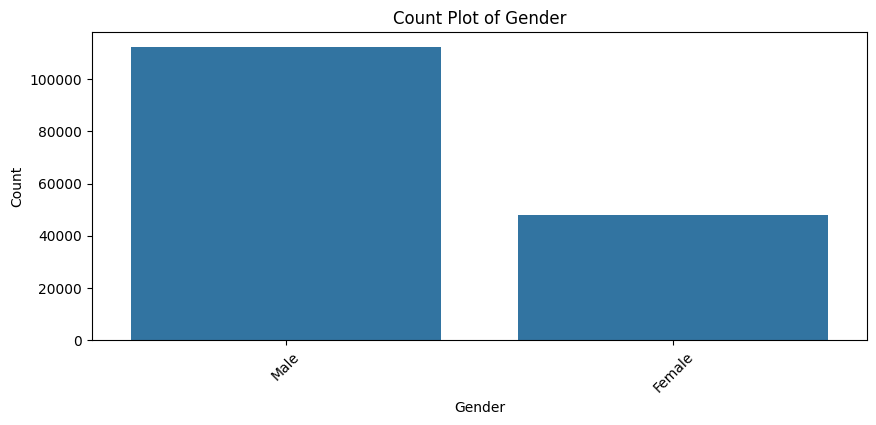


Value counts for Gender:
Gender
Male      112391
Female     47901
Name: count, dtype: int64


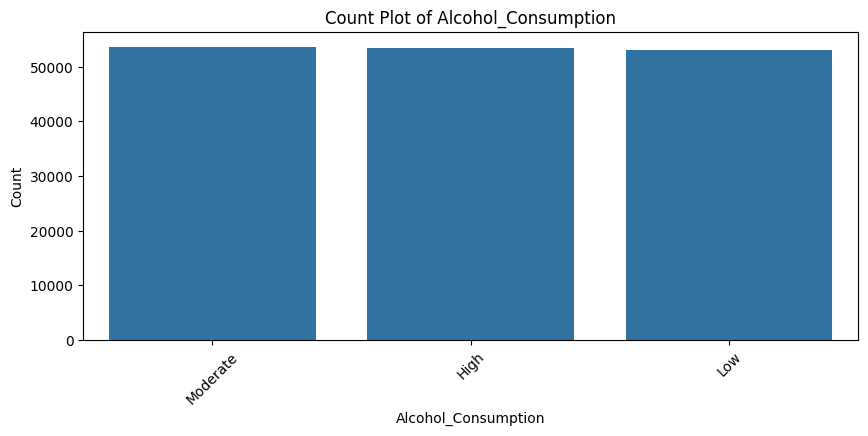


Value counts for Alcohol_Consumption:
Alcohol_Consumption
Moderate    53708
High        53437
Low         53147
Name: count, dtype: int64


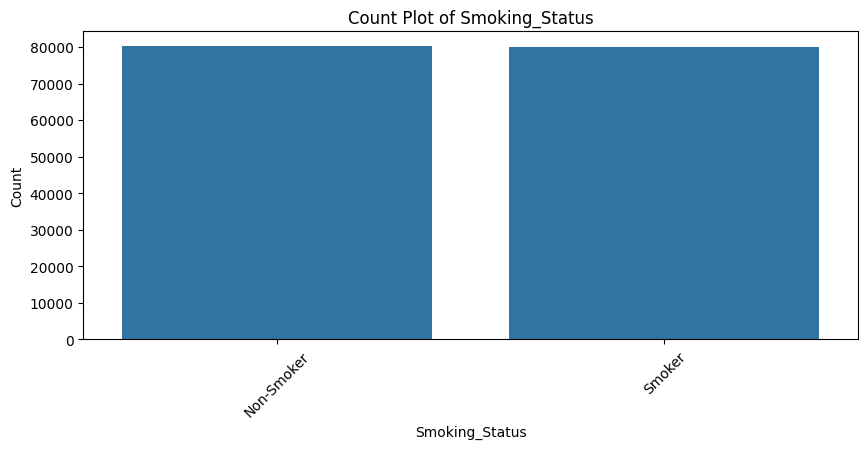


Value counts for Smoking_Status:
Smoking_Status
Non-Smoker    80237
Smoker        80055
Name: count, dtype: int64


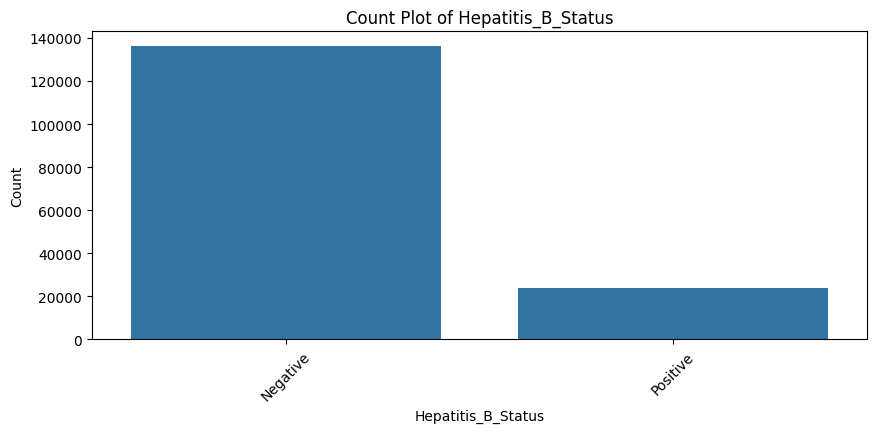


Value counts for Hepatitis_B_Status:
Hepatitis_B_Status
Negative    136245
Positive     24047
Name: count, dtype: int64


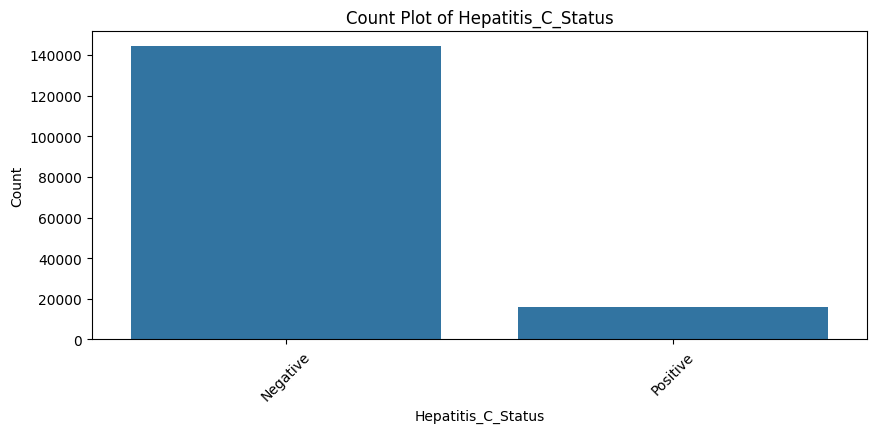


Value counts for Hepatitis_C_Status:
Hepatitis_C_Status
Negative    144336
Positive     15956
Name: count, dtype: int64


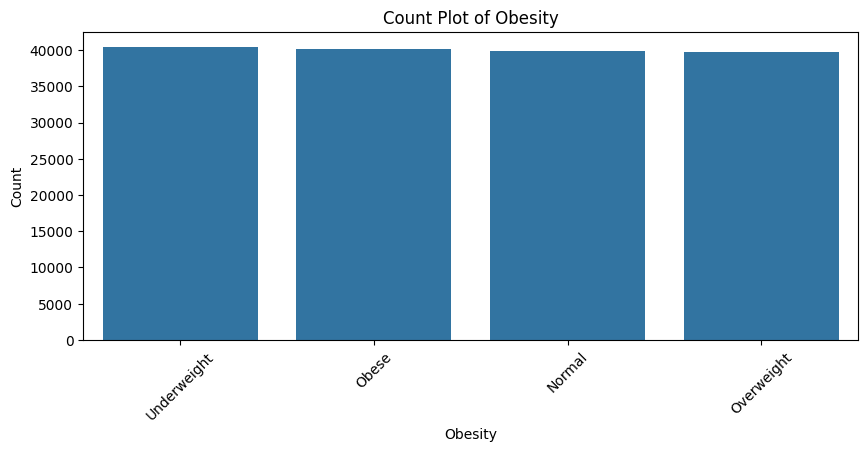


Value counts for Obesity:
Obesity
Underweight    40467
Obese          40209
Normal         39904
Overweight     39712
Name: count, dtype: int64


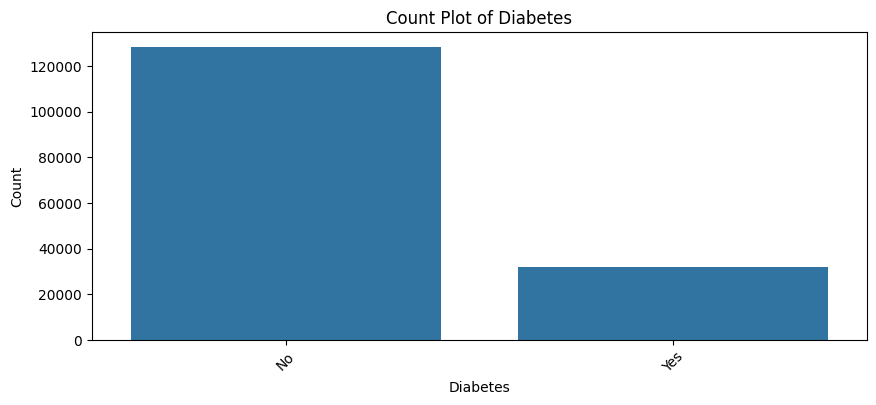


Value counts for Diabetes:
Diabetes
No     128412
Yes     31880
Name: count, dtype: int64


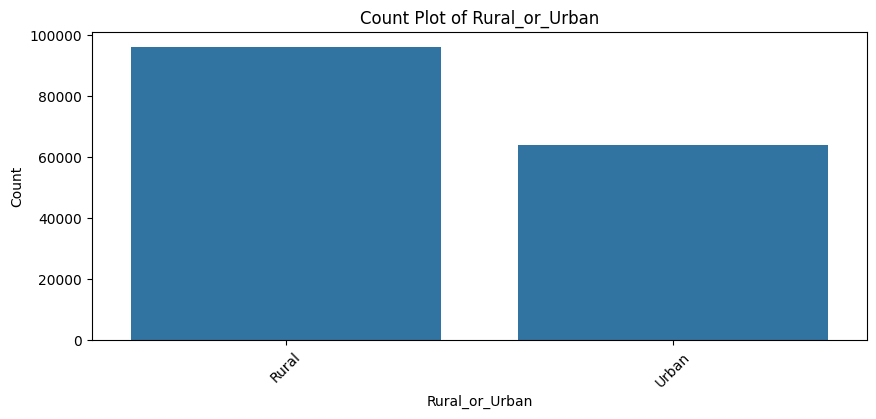


Value counts for Rural_or_Urban:
Rural_or_Urban
Rural    96330
Urban    63962
Name: count, dtype: int64


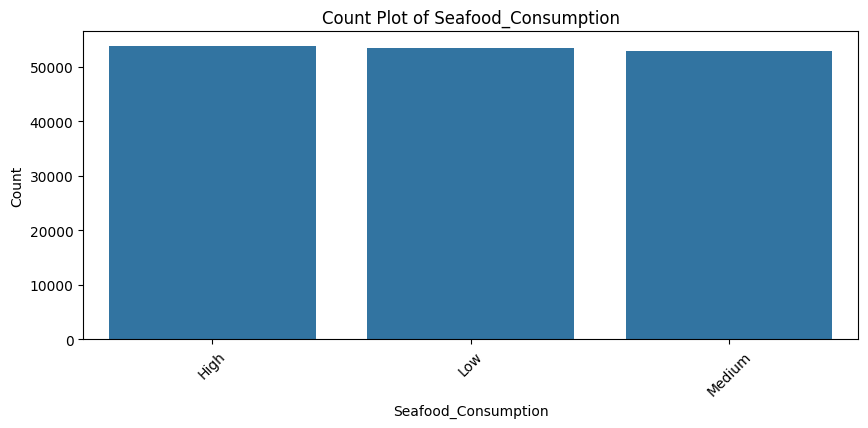


Value counts for Seafood_Consumption:
Seafood_Consumption
High      53818
Low       53463
Medium    53011
Name: count, dtype: int64


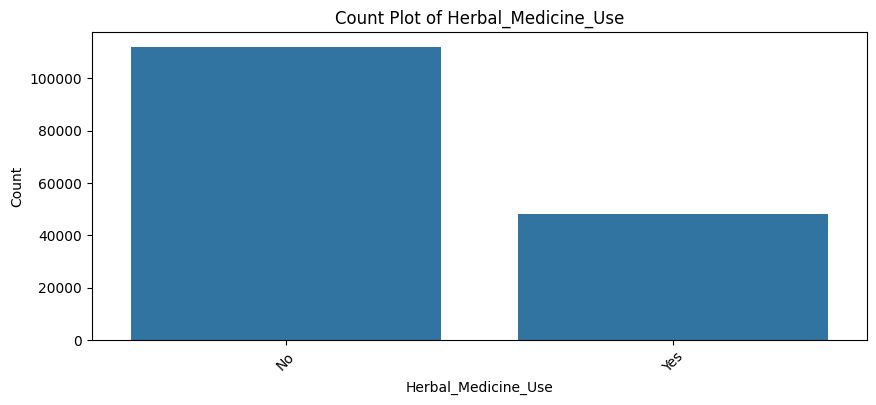


Value counts for Herbal_Medicine_Use:
Herbal_Medicine_Use
No     112024
Yes     48268
Name: count, dtype: int64


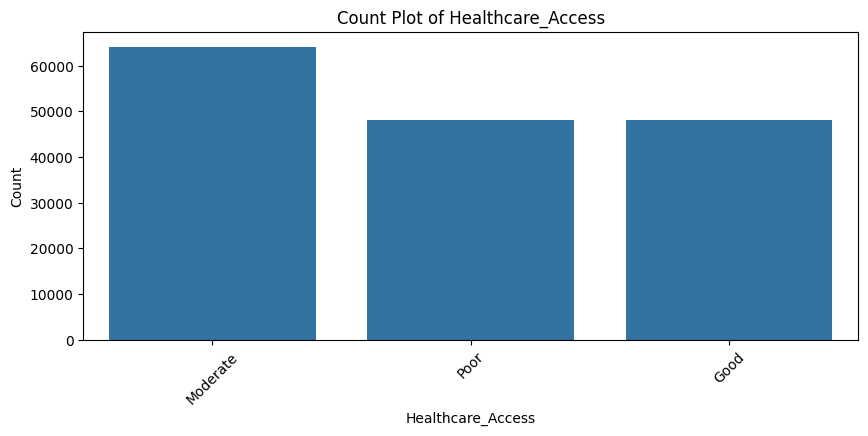


Value counts for Healthcare_Access:
Healthcare_Access
Moderate    64191
Poor        48071
Good        48030
Name: count, dtype: int64


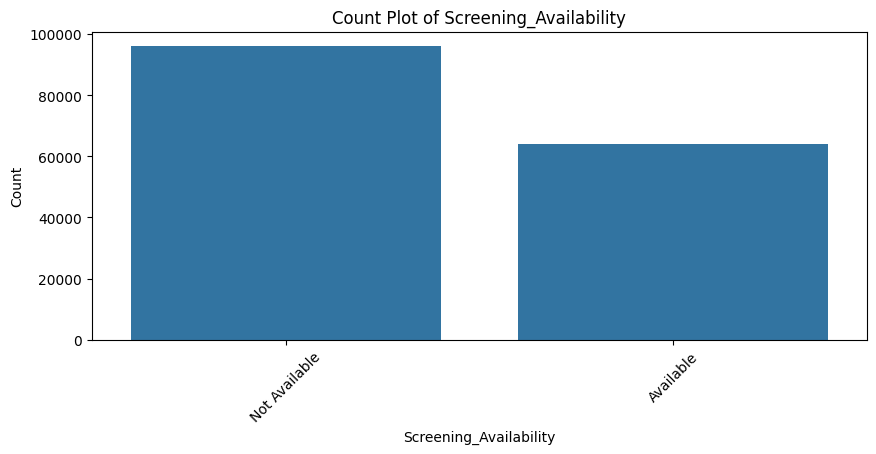


Value counts for Screening_Availability:
Screening_Availability
Not Available    96065
Available        64227
Name: count, dtype: int64


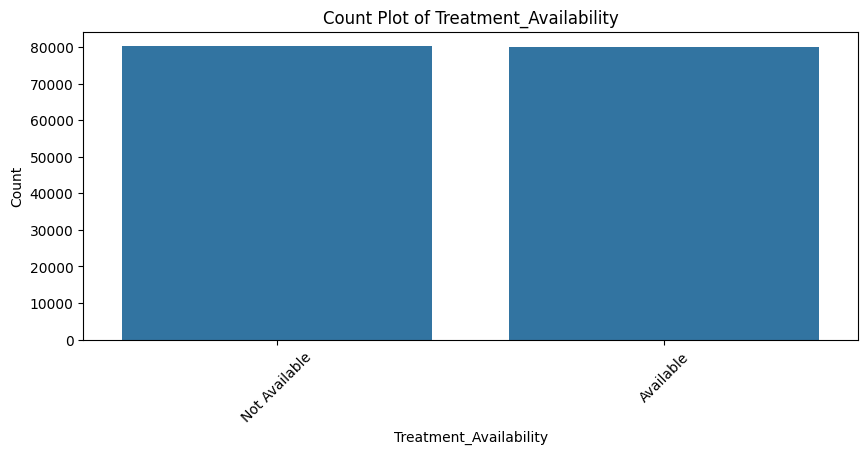


Value counts for Treatment_Availability:
Treatment_Availability
Not Available    80182
Available        80110
Name: count, dtype: int64


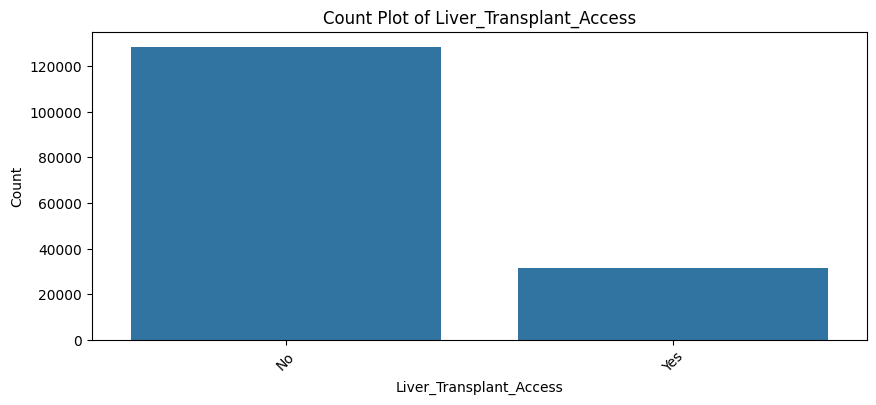


Value counts for Liver_Transplant_Access:
Liver_Transplant_Access
No     128522
Yes     31770
Name: count, dtype: int64


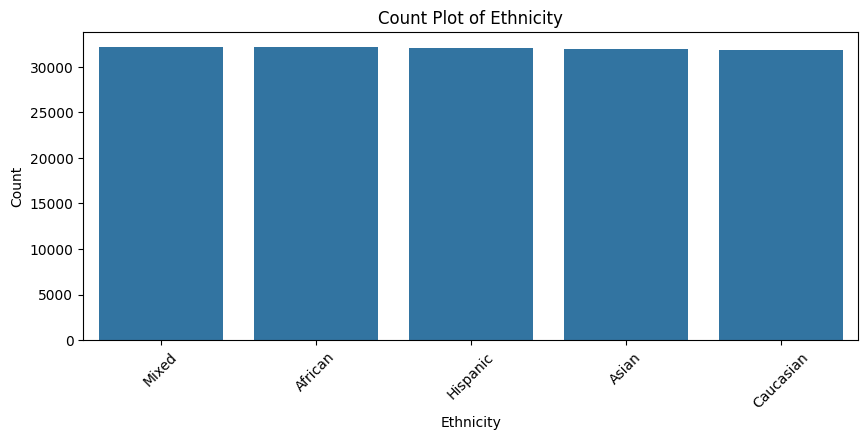


Value counts for Ethnicity:
Ethnicity
Mixed        32203
African      32193
Hispanic     32068
Asian        31955
Caucasian    31873
Name: count, dtype: int64


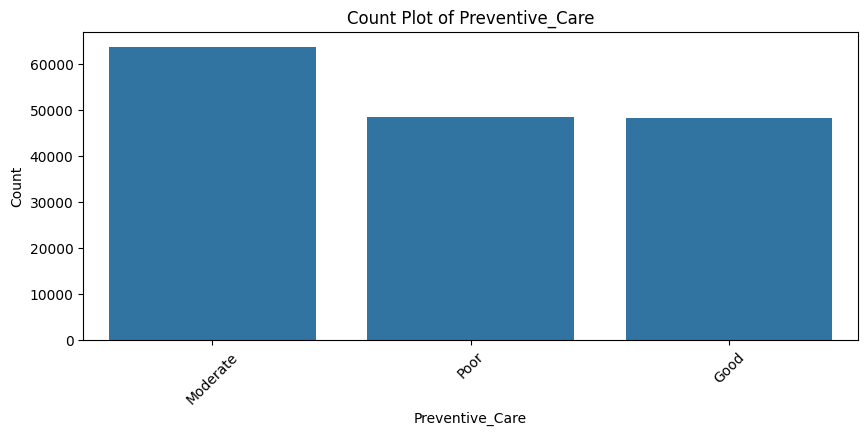


Value counts for Preventive_Care:
Preventive_Care
Moderate    63695
Poor        48442
Good        48155
Name: count, dtype: int64


In [12]:
categorical_cols = ['Country', 'Region', 'Gender', 'Alcohol_Consumption', 'Smoking_Status',
                'Hepatitis_B_Status', 'Hepatitis_C_Status', 'Obesity', 'Diabetes', 
                'Rural_or_Urban', 'Seafood_Consumption', 'Herbal_Medicine_Use',
                'Healthcare_Access', 'Screening_Availability', 'Treatment_Availability',
                'Liver_Transplant_Access', 'Ethnicity', 'Preventive_Care']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    order = data[col].value_counts().index  # Sorting by frequency
    sns.countplot(x=col, data=data, order=order)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-labels if needed for clarity
    plt.show()
    
    # Print frequency counts
    print(f'\nValue counts for {col}:')
    print(data[col].value_counts())

In [13]:
# Box plot for each numerical feature to detect outliers
# Loop through numerical columns and calculate outliers using the IQR method
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    
    print(f'{col}:')
    print(f'  Lower bound: {lower_bound}')
    print(f'  Upper bound: {upper_bound}')
    print(f'  Number of outliers: {len(outliers)}')
    print()

Population:
  Lower bound: -746981231.75
  Upper bound: 2250942024.25
  Number of outliers: 0

Incidence_Rate:
  Lower bound: -14.328074421487676
  Upper bound: 51.39901030403759
  Number of outliers: 0

Mortality_Rate:
  Lower bound: -13.495580568177942
  Upper bound: 44.59121430184888
  Number of outliers: 0

Age:
  Lower bound: -15.5
  Upper bound: 124.5
  Number of outliers: 0

Survival_Rate:
  Lower bound: -29.42653490221992
  Upper bound: 129.38976433453269
  Number of outliers: 0

Cost_of_Treatment:
  Lower bound: -24363.426878205122
  Upper bound: 74894.08152771971
  Number of outliers: 0



The IQR-based outlier detection results indicate that none of the numerical features—Population, Incidence_Rate, Mortality_Rate, Age, Survival_Rate, and Cost_of_Treatment—have any values falling outside the computed lower and upper bounds. Although the calculated lower bounds for several features are negative (for instance, Population at –746,981,231.75 and Survival_Rate at –29.43), this outcome is a byproduct of the IQR method and does not necessarily imply that the actual data contains negative values. The absence of detected outliers suggests that the data points for these features are relatively concentrated within a consistent range, which bodes well for subsequent analyses. However, it is important to verify that these negative thresholds are appropriate given the context of each variable—especially for features that should logically only have non-negative values—to ensure that no data quality issues are being overlooked.

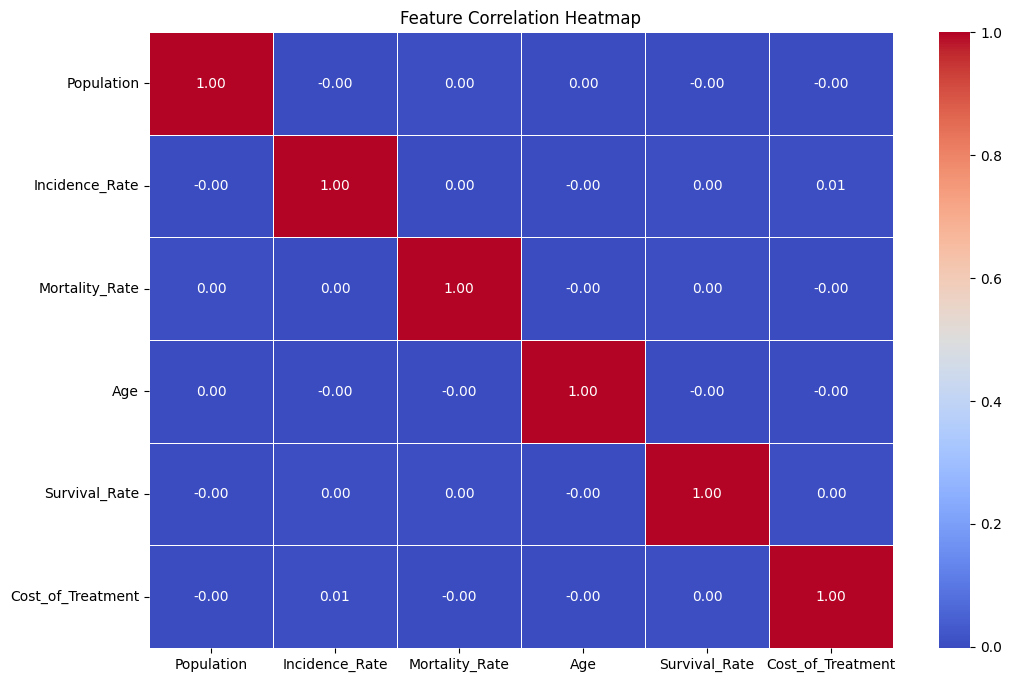

In [14]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [15]:
ordinal_features = ['Alcohol_Consumption', 'Obesity', 'Healthcare_Access', 
                    'Preventive_Care', 'Seafood_Consumption']

binary_features = ['Smoking_Status', 'Hepatitis_B_Status', 'Hepatitis_C_Status',
                   'Diabetes', 'Screening_Availability', 'Treatment_Availability', 
                   'Liver_Transplant_Access', 'Herbal_Medicine_Use']

nominal_features = ['Country', 'Region', 'Gender', 'Rural_or_Urban', 'Ethnicity']

numerical_features = ['Population', 'Incidence_Rate', 'Mortality_Rate', 'Age', 'Cost_of_Treatment', 'Survival_Rate']

target_variable = ['Prediction']


In [16]:
all_columns = set(data.columns)  # Convert dataset columns to a set

# Create a combined set for verification (without modifying lists)
defined_features = set(ordinal_features) | set(binary_features) | set(nominal_features) | set(target_variable) | set(numerical_features)

# Find missing or extra columns
missing_columns = all_columns - defined_features
extra_columns = defined_features - all_columns

if not missing_columns and not extra_columns:
    print("Defined features cover all columns!")
else:
    print("Check the following:")
    if missing_columns:
        print(f"Missing columns: {missing_columns}")
    if extra_columns:
        print(f"Extra columns that may not exist in data: {extra_columns}")

Defined features cover all columns!


#### Ordinal Encoding

In [17]:
ordinal_mappings = [
    ['Low', 'Moderate', 'High'],
    ['Underweight', 'Normal', 'Overweight', 'Obese'],
    ['Poor', 'Moderate', 'Good'],
    ['Poor', 'Moderate', 'Good'],
    ['Low', 'Medium', 'High']
]

ordinal_encoder = OrdinalEncoder(categories=ordinal_mappings)

data[ordinal_features] = ordinal_encoder.fit_transform(data[ordinal_features])

#### Binary Encoding


In [18]:
for col in binary_features:
    data[col] = data[col].map({
        'No': 0, 'Yes': 1, 
        'Negative': 0, 'Positive': 1,
        'Non-Smoker': 0, 'Smoker': 1,
        'Not Available': 0, 'Available': 1,
        })

#### One-Hot Encoding

In [19]:
# Apply OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_nominals = one_hot_encoder.fit_transform(data[nominal_features])

In [20]:
# Convert to DataFrame
nominal_feature_names = one_hot_encoder.get_feature_names_out(nominal_features)
df_nominal = pd.DataFrame(encoded_nominals, columns=nominal_feature_names, index=data.index)

# Drop original nominal columns and concatenate encoded features
data = data.drop(columns=nominal_features).join(df_nominal)

In [21]:
data.select_dtypes(exclude=[np.number]).columns

Index(['Prediction'], dtype='object')

In [22]:
# Convert target variable 'Prediction' (Yes/No) to binary format
data['Prediction'] = data['Prediction'].map({'No': 0, 'Yes': 1})

In [23]:
data.head()

,Population,Incidence_Rate,Mortality_Rate,Age,Alcohol_Consumption,Smoking_Status,Hepatitis_B_Status,Hepatitis_C_Status,Obesity,Diabetes,...,Region_Sub-Saharan Africa,Gender_Female,Gender_Male,Rural_or_Urban_Rural,Rural_or_Urban_Urban,Ethnicity_African,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Mixed
0,340672131,15.381360,6.160480,81,0.0,1,0,0,1.0,0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1054632817,3.306101,14.392985,87,0.0,1,0,0,0.0,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,751241440,9.325053,12.777878,34,1.0,1,0,0,0.0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1167333367,9.399658,8.634609,63,0.0,0,1,0,0.0,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1082070787,9.665663,12.422518,85,2.0,0,1,0,3.0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### Scaling

In [24]:
scaler = StandardScaler()

# Create a copy of the dataset to store the scaled values (optional)
data_scaled = data.copy()

data_scaled[numerical_features] = scaler.fit_transform(data[numerical_features])

In [25]:
data_scaled.head()

,Population,Incidence_Rate,Mortality_Rate,Age,Alcohol_Consumption,Smoking_Status,Hepatitis_B_Status,Hepatitis_C_Status,Obesity,Diabetes,...,Region_Sub-Saharan Africa,Gender_Female,Gender_Male,Rural_or_Urban_Rural,Rural_or_Urban_Urban,Ethnicity_African,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Mixed
0,-0.952020,-0.330283,-1.117933,1.305712,0.0,1,0,0,1.0,0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.697509,-1.599577,-0.135164,1.602916,0.0,1,0,0,0.0,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.003444,-0.966893,-0.327970,-1.022386,1.0,1,0,0,0.0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.957892,-0.959051,-0.822580,0.414100,0.0,0,1,0,0.0,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.760902,-0.931090,-0.370392,1.503848,2.0,0,1,0,3.0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [26]:
# Saving the feature engineering components for model_deployment
with open("ordinal_encoder.pkl", "wb") as f:
    pickle.dump(ordinal_encoder, f)

with open("one_hot_encoder.pkl", "wb") as f:
    pickle.dump(one_hot_encoder, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("\n✅ Feature names saved successfully!")


✅ Feature names saved successfully!


### Logistic Regression

Data Split Successful: X_train shape: (128233, 68), X_test shape: (32059, 68)

 Logistic Regression Performance:
Accuracy: 0.5055
ROC-AUC Score: 0.5028
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.51      0.61     24054
           1       0.25      0.50      0.34      8005

    accuracy                           0.51     32059
   macro avg       0.50      0.50      0.47     32059
weighted avg       0.63      0.51      0.54     32059



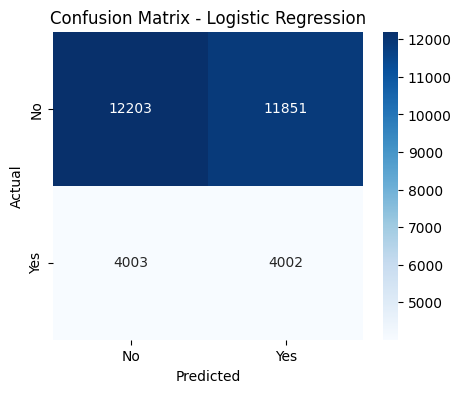

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

X = data_scaled.drop(columns=['Prediction'])  # Fe
y = data_scaled['Prediction']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Data Split Successful: X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)
y_pred_proba_log = log_reg.predict_proba(X_test)[:, 1]

# Evaluate performance
accuracy_log = accuracy_score(y_test, y_pred_log)
roc_auc_log = roc_auc_score(y_test, y_pred_proba_log)

print("\n Logistic Regression Performance:")
print(f"Accuracy: {accuracy_log:.4f}")
print(f"ROC-AUC Score: {roc_auc_log:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_log, zero_division=1))

# Confusion Matrix
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [28]:
# Save feature names (to ensure correct order during inference)
with open("feature_names.pkl", "wb") as f:
    pickle.dump(list(X_train.columns), f)


### Random Forest Classifier 


 Random Forest Performance:
Accuracy: 0.7503
ROC-AUC Score: 0.5024
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     24054
           1       1.00      0.00      0.00      8005

    accuracy                           0.75     32059
   macro avg       0.88      0.50      0.43     32059
weighted avg       0.81      0.75      0.64     32059



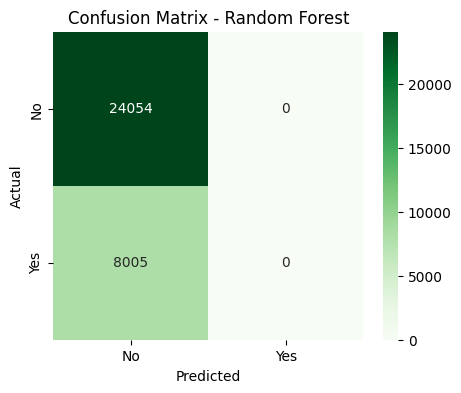

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print("\n Random Forest Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"ROC-AUC Score: {roc_auc_rf:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf, zero_division=1))

# Confusion Matrix
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

### Gradient Boosting Classifier


📌 Gradient Boosting Performance:
Accuracy: 0.7502
ROC-AUC Score: 0.5018
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     24054
           1       0.25      0.00      0.00      8005

    accuracy                           0.75     32059
   macro avg       0.50      0.50      0.43     32059
weighted avg       0.63      0.75      0.64     32059



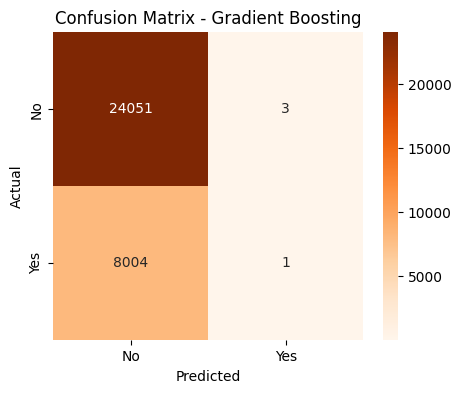

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Predictions
y_pred_gb = gb.predict(X_test)
y_pred_proba_gb = gb.predict_proba(X_test)[:, 1]

# Evaluate performance
accuracy_gb = accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)

print("\n📌 Gradient Boosting Performance:")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"ROC-AUC Score: {roc_auc_gb:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_gb, zero_division=1))

# Confusion Matrix
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

## Simple Deep learning Model

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Convert to NumPy arrays
X_train_nn = np.array(X_train)
X_test_nn = np.array(X_test)
y_train_nn = np.array(y_train)
y_test_nn = np.array(y_test)

# Define the Neural Network Architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),  # Dropout to prevent overfitting
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_nn, y_train_nn, epochs=20, batch_size=32, validation_data=(X_test_nn, y_test_nn), verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_nn, y_test_nn)
print(f"\n Neural Network Performance:")
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/20


/Users/tmt0947/anaconda3/envs/venvmsds422/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4008/4008 ━━━━━━━━━━━━━━━━━━━━ 4s 744us/step - accuracy: 0.7502 - loss: 0.5677 - val_accuracy: 0.7503 - val_loss: 0.5630
Epoch 2/20
4008/4008 ━━━━━━━━━━━━━━━━━━━━ 3s 739us/step - accuracy: 0.7497 - loss: 0.5641 - val_accuracy: 0.7503 - val_loss: 0.5632
Epoch 3/20
4008/4008 ━━━━━━━━━━━━━━━━━━━━ 3s 841us/step - accuracy: 0.7490 - loss: 0.5637 - val_accuracy: 0.7503 - val_loss: 0.5630
Epoch 4/20
4008/4008 ━━━━━━━━━━━━━━━━━━━━ 3s 741us/step - accuracy: 0.7510 - loss: 0.5614 - val_accuracy: 0.7503 - val_loss: 0.5627
Epoch 5/20
4008/4008 ━━━━━━━━━━━━━━━━━━━━ 3s 798us/step - accuracy: 0.7486 - loss: 0.5633 - val_accuracy: 0.7503 - val_loss: 0.5625
Epoch 6/20
4008/4008 ━━━━━━━━━━━━━━━━━━━━ 3s 741us/step - accuracy: 0.7479 - loss: 0.5636 - val_accuracy: 0.7503 - val_loss: 0.5633
Epoch 7/20
4008/4008 ━━━━━━━━━━━━━━━━━━━━ 3s 825us/step - accuracy: 0.7503 - loss: 0.5605 - val_accuracy: 0.7503 - val_loss: 0.5637
Epoch 8/20
4008/4008 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7516 - loss: 0.5588

In [32]:
# Save ML model (Random Forest as an example)
with open("rf_model.pkl", "wb") as model_file:
    pickle.dump(rf, model_file)

# Save Deep Learning Model
model.save("deep_learning_model.keras")